# Credit EDA Case Study

### Data Overview
This notebook uses two datasets:-

- `'application_data.csv'` contains all the information of the client at the time of application.The data is about whether a client has payment difficulties.

- `'previous_application.csv'` contains information about the client’s previous loan data. It contains the data whether the previous application had been **Approved, Cancelled, Refused or Unused offer**.

## Data Sourcing

In [1]:

# import application_data.csv

#Load the libraries
import pandas as pd #To work with dataset
import numpy as np #Math library
import seaborn as sns #Graph library that use matplot in background
import matplotlib.pyplot as plt #to plot some parameters in seaborn

pd.set_option('display.max_columns',999)
pd.set_option('display.max_rows',200)
pd.set_option('float_format', '{:f}'.format)
 
#please change the path as per your local machine 

application_data_path = "application_data.csv"

#Importing the data
df_app_data = pd.read_csv(application_data_path)

# dataset info and some details 
print(df_app_data.shape)
print('\n')
print(df_app_data.info())


(307511, 122)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
None


In [2]:
df_app_data.describe(include='all')

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511,307511,307511,307511,307511.000000,307511.000000,307511.000000,307499.000000,307233.000000,306219,307511,307511,307511,307511,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,211120,307509.000000,307511.000000,307511.000000,307511,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511,134133.000000,306851.000000,246546.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,97216,153214,159080.000000,151170,161756,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
unique,nan,nan,2,3,2,2,nan,nan,nan,nan,nan,7,8,5,6,6,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,18,nan,nan,nan,7,nan,nan,nan,nan,nan,nan,nan,58,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,

In [3]:
df_app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.000000,406597.500000,24700.500000,351000.000000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.000000,-2120,nan,1,1,0,1,1,0,Laborers,1.000000,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.024700,0.036900,0.972200,0.619200,0.014300,0.000000,0.069000,0.083300,0.125000,0.036900,0.020200,0.019000,0.000000,0.000000,0.025200,0.038300,0.972200,0.634100,0.014400,0.000000,0.069000,0.083300,0.125000,0.037700,0.022000,0.019800,0.000000,0.000000,0.025000,0.036900,0.972200,0.624300,0.014400,0.000000,0.069000,0.083300,0.125000,0.037500,0.020500,0.019300,0.000000,0.000000,reg oper account,block of flats,0.014900,"Stone, brick",No,2.000000,2.000000,2.000000,2.000000,-1134.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
1,100003,0,Cash loans,F,N,N,0,270000.000000,1293502.500000,35698.500000,1129500.000000,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.000000,-291,nan,1,1,0,1,1,0,Core staff,2.000000,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,nan,0.095900,0.052900,0.985100,0.796000,0.060500,0.080000,0.034500,0.291700,0.333300,0.013000,0.077300,0.054900,0.003900,0.009800,0.092400,0.053800,0.985100,0.804000,0.049700,0.080600,0.034500,0.291700,0.333300,0.012800,0.079000,0.055400,0.000000,0.000000,0.096800,0.052900,0.985100,0.798700,0.060800,0.080000,0.034500,0.291700,0.333300,0.013200,0.078700,0.055800,0.003900,0.010000,reg oper account,block of flats,0.071400,Block,No,1.000000,0.000000,1.000000,0.000000,-828.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,100004,0,Revolving loans,M,Y,Y,0,675

## Data Cleaning and Manipulation

**Calculate percentage of missing values of all columns**

In [4]:
round(100*(df_app_data.isnull().sum()/len(df_app_data.index)),2)

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.000000
AMT_GOODS_PRICE                 0.090000
NAME_TYPE_SUITE                 0.420000
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
OWN_CAR_AGE                    65.990000
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE 

__Remove the columns with missing values more than 40%__

In [5]:
# remove columns with high missing percentage

df_missing = round(100*(df_app_data.isnull().sum()/len(df_app_data.index)),2)

# column with more than 40% missing values

column = df_missing[df_missing > 40].index 

# remove/drop columns with high percentage

df_app_data.drop(column,axis = 1,inplace = True)


### Derive Metrics to Impute missing values

#### 1. AMT_GOODS_PRICE (Numerical) > 0.09%

If we analyse application data file for NAME_CONTRACT_TYPE = Revolving loans, for all the entries where data is available, AMT_CREDIT is equal to AMT_GOODS_PRICE. The rows for which AMT_GOODS_PRICE is null/blank are for NAME_CONTRACT_TYPE = Revolving loans. Hence, will impute data for missing values for AMT_GOODS_PRICE with respective row's AMT_CREDIT value  

`df_app_data.loc[pd.isnull(df_app_data['AMT_GOODS_PRICE']),'AMT_GOODS_PRICE'] = df_app_data['AMT_CREDIT']`

check if AMT_GOODS_PRICE null values are imputed

`sum(pd.isnull(df_app_data['AMT_GOODS_PRICE']))`


#### 2. NAME_TYPE_SUITE (Categorical) > 0.42%
**Logic** : There are only two possibilities client is accompanied with somebody or came alone whilst applying for loan, hence whereever this field is blank,we will fill it with "Unaccompanied" categorical value

`df_app_data.loc[pd.isnull(df_app_data['NAME_TYPE_SUITE']),'NAME_TYPE_SUITE'] = "Unaccompanied"`

check if NAME_TYPE_SUITE null values are imputed

`sum(pd.isnull(df_app_data['NAME_TYPE_SUITE']))`

#### 3. OCCUPATION_TYPE(Categorical) > 31.35%
**Assumption:** We are assuming, the Occupation type which is not listed in the application form are kept blank, hence will impute null values with categorical value "Others"

`df_app_data.loc[pd.isnull(df_app_data['OCCUPATION_TYPE']),'OCCUPATION_TYPE'] = "Others"`

check if OCCUPATION_TYPE null values are imputed

`sum(pd.isnull(df_app_data['OCCUPATION_TYPE']))`

#### 4. OBS_30_CNT_SOCIAL_CIRCLE (Categorical/Numerical) > 0.33%

Considering its meaning this is categorical column, we can categorise loan application where OBS_30_CNT_SOCIAL_CIRCLE is 1, 2 or 3 or so on.

Also, this field can be used as numerical to find how many OBS_30_CNT_SOCIAL_CIRCLE found for target = 1 compared to target = 0

**Logic** : If we see categorywise, maximum(more than 60%) applicants have OBS_30_CNT_SOCIAL_CIRCLE = 0, hence , we will impute null values with mode value for column OBS_30_CNT_SOCIAL_CIRCLE 

`df_app_data.loc[pd.isnull(df_app_data['OBS_30_CNT_SOCIAL_CIRCLE']),'OBS_30_CNT_SOCIAL_CIRCLE'] = df_app_data['OBS_30_CNT_SOCIAL_CIRCLE'].mode()`

check if OBS_30_CNT_SOCIAL_CIRCLE null values are imputed

`sum(pd.isnull(df_app_data['OBS_30_CNT_SOCIAL_CIRCLE']))`

#### 5. AMT_REQ_CREDIT_BUREAU_HOUR (Categorical/Numerical) > 13.50%

Considering its meaning this is categorical column, we can categorise loan application where AMT_REQ_CREDIT_BUREAU_HOUR(Number of enquiries to Credit bureau) is 1, 2 or 3 or so on.

Also, this field can be used as numerical to find how many AMT_REQ_CREDIT_BUREAU_HOUR found for target = 1 compared to target = 0

**Logic** : If we see categorywise, maximum(more than 60%) applicants have AMT_REQ_CREDIT_BUREAU_HOUR = 0, hence , we will impute null values with mode value for column AMT_REQ_CREDIT_BUREAU_HOUR

`df_app_data.loc[pd.isnull(df_app_data['AMT_REQ_CREDIT_BUREAU_HOUR']),'AMT_REQ_CREDIT_BUREAU_HOUR'] = df_app_data['AMT_REQ_CREDIT_BUREAU_HOUR'].mode()`

check if AMT_REQ_CREDIT_BUREAU_HOUR null values are imputed

`sum(pd.isnull(df_app_data['AMT_REQ_CREDIT_BUREAU_HOUR']))`

### Datatype check for all columns

In [6]:
Col_dtype = ['SK_ID_CURR','TARGET','NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','DAYS_BIRTH','DAYS_EMPLOYED','OCCUPATION_TYPE','CNT_FAM_MEMBERS','ORGANIZATION_TYPE']
df_app_data[Col_dtype].dtypes

SK_ID_CURR               int64
TARGET                   int64
NAME_CONTRACT_TYPE      object
CODE_GENDER             object
FLAG_OWN_CAR            object
FLAG_OWN_REALTY         object
CNT_CHILDREN             int64
AMT_INCOME_TOTAL       float64
AMT_CREDIT             float64
AMT_ANNUITY            float64
AMT_GOODS_PRICE        float64
NAME_TYPE_SUITE         object
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
NAME_HOUSING_TYPE       object
DAYS_BIRTH               int64
DAYS_EMPLOYED            int64
OCCUPATION_TYPE         object
CNT_FAM_MEMBERS        float64
ORGANIZATION_TYPE       object
dtype: object

In [7]:
#SK_ID_CURR is application ID so it can be converted to String
df_app_data['SK_ID_CURR'] = df_app_data['SK_ID_CURR'].astype('str')

In [8]:
df_app_data['TARGET'] = df_app_data['TARGET'].astype('str')
df_app_data['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [9]:
# CNT_FAM_MEMBERS is count of family members so it should be integer.

# impute null values with mode for CNT_FAM_MEMBERS, we need this column in further analysis
# Note there are only 2 rows with nan value, so it will not make any difference if we impute it with mode value which is 2.0 
df_app_data['CNT_FAM_MEMBERS'].mode()
df_app_data.loc[pd.isnull(df_app_data['CNT_FAM_MEMBERS']),'CNT_FAM_MEMBERS'] = 2.0

# change it to int datatype as its a number of family members and its should be in integr.
df_app_data['CNT_FAM_MEMBERS'] = df_app_data['CNT_FAM_MEMBERS'].astype('int')
df_app_data['CNT_FAM_MEMBERS'].value_counts()

2     158359
1      67847
3      52601
4      24697
5       3478
6        408
7         81
8         20
9          6
10         3
16         2
12         2
14         2
20         2
11         1
13         1
15         1
Name: CNT_FAM_MEMBERS, dtype: int64

### Outliers Treatment

For outliers check, we will check by plotting the box plot of respective columns. Will perform the outliers check on following columns:

1. AMT_INCOME_TOTAL
2. AMT_CREDIT
3. AMT_ANNUITY
4. AMT_GOODS_PRICE
5. AGE
6. YEARS_WRK_EXP


#### 1. AMT_INCOME_TOTAL

Text(0.5, 1.0, 'AMT_INCOME_TOTAL (With Outliers)')

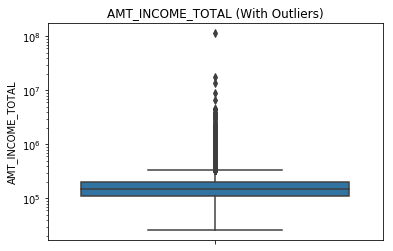

In [10]:
#Plotting the box plot 
plt.yscale('log')#changing to logarithmic scale
sns.boxplot(y=df_app_data['AMT_INCOME_TOTAL'])
plt.title("AMT_INCOME_TOTAL (With Outliers)")


Perform IQR method to treat outliers of AMT_INCOME_TOTAL

In [11]:
#Let's calculate IQR and multiplying with 1.5
IQR1=(df_app_data.AMT_INCOME_TOTAL.quantile(0.75)-df_app_data.AMT_INCOME_TOTAL.quantile(0.25))


#As we can see from the above plot, we have outliers at higher quantile. Adding the IQR1 value to the higher quantile 
outlier1=(1.5 * IQR1) + df_app_data.AMT_INCOME_TOTAL.quantile(0.75)
outlier1

337500.0

Values above this value are treated as outliers for this column

Text(0.5, 1.0, 'AMT_INCOME_TOTAL (Outliers Treated)')

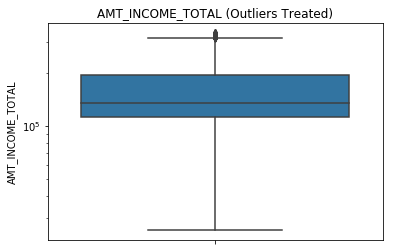

In [12]:
#Let's remove the outliers from the AMT_INCOME_TOTAL column and check plotting the box plot again
df_app_data=df_app_data[df_app_data.AMT_INCOME_TOTAL < outlier1]

plt.yscale('log')
sns.boxplot(y=df_app_data['AMT_INCOME_TOTAL'])
plt.title("AMT_INCOME_TOTAL (Outliers Treated)")


#### 2. AMT_CREDIT

Text(0.5, 1.0, 'AMT_CREDIT (With Outliers)')

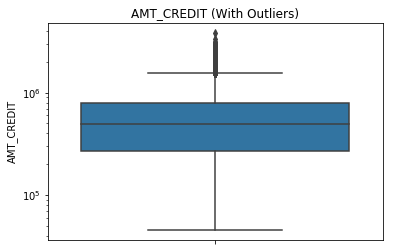

In [13]:
#Let's perform the above steps for treating this column too
plt.yscale('log')
sns.boxplot(y=df_app_data['AMT_CREDIT'])
plt.title("AMT_CREDIT (With Outliers)")


In [14]:
IQR2=(df_app_data.AMT_CREDIT.quantile(0.75)-df_app_data.AMT_CREDIT.quantile(0.25)) * 1.5
outlier2= IQR2 + df_app_data.AMT_CREDIT.quantile(0.75)
outlier2

1562827.5

Text(0.5, 1.0, 'AMT_CREDIT (Outliers Treated)')

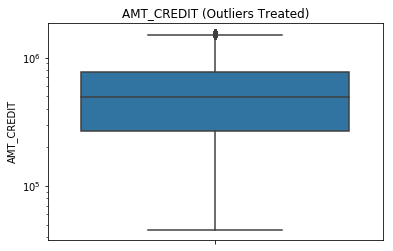

In [15]:
df_app_data=df_app_data[df_app_data.AMT_CREDIT < outlier2]

plt.yscale('log')
sns.boxplot(y=df_app_data['AMT_CREDIT'])
plt.title("AMT_CREDIT (Outliers Treated)")


#### 3. AMT_ANNUITY

Text(0.5, 1.0, 'AMT_ANNUITY (With Outliers)')

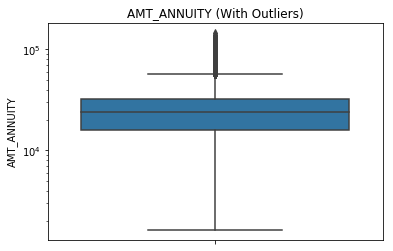

In [16]:
plt.yscale('log')
sns.boxplot(y=df_app_data['AMT_ANNUITY'])
plt.title("AMT_ANNUITY (With Outliers)")


In [17]:
IQR3=(df_app_data.AMT_ANNUITY.quantile(0.75))-(df_app_data.AMT_ANNUITY.quantile(0.25)) 
outlier3= (1.5 * IQR3) + df_app_data.AMT_ANNUITY.quantile(0.75)
outlier3

57368.25

Text(0.5, 1.0, 'AMT_ANNUITY (Outliers Treated)')

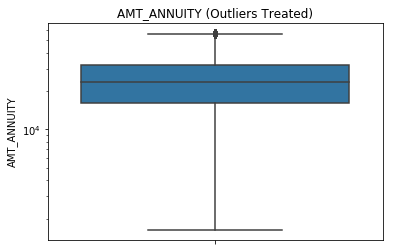

In [18]:
df_app_data=df_app_data[df_app_data.AMT_ANNUITY < outlier3]

plt.yscale('log')
sns.boxplot(y=df_app_data['AMT_ANNUITY'])
plt.title("AMT_ANNUITY (Outliers Treated)")


#### 4. AMT_GOODS_PRICE

Text(0.5, 1.0, 'AMT_GOODS_PRICE (With Outliers)')

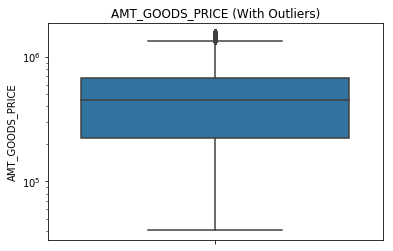

In [19]:
plt.yscale('log')
sns.boxplot(y=df_app_data['AMT_GOODS_PRICE'])
plt.title("AMT_GOODS_PRICE (With Outliers)")


In [20]:
IQR4=(df_app_data.AMT_GOODS_PRICE.quantile(0.75)-df_app_data.AMT_GOODS_PRICE.quantile(0.25)) * 1.5
outlier4= IQR4 + df_app_data.AMT_GOODS_PRICE.quantile(0.75)
outlier4

1350000.0

Text(0.5, 1.0, 'AMT_GOODS_PRICE (Outliers Treated)')

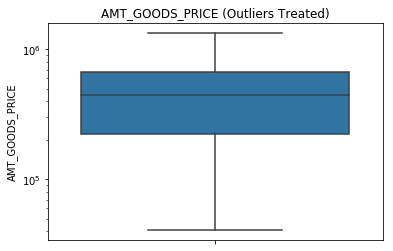

In [21]:
df_app_data=df_app_data[df_app_data.AMT_GOODS_PRICE < outlier4]

plt.yscale('log')
sns.boxplot(y=df_app_data['AMT_GOODS_PRICE'])
plt.title("AMT_GOODS_PRICE (Outliers Treated)")


#### Creating some calculated fields

In [22]:
# converting number of days to age of the client

# creating new variable for age of the client at the time of application

df_app_data['AGE'] = abs((df_app_data['DAYS_BIRTH']/365)).astype(int)

# converting number of days of emplyment to years years of experience at the time of loan application

# creating new variable for years of work experienc of the client at the time of application 

df_app_data['YEARS_WRK_EXP'] = abs((df_app_data['DAYS_EMPLOYED']/365)).astype(int)

df_app_data = df_app_data.drop(['DAYS_BIRTH','DAYS_EMPLOYED'],axis = 1)
df_app_data.dtypes

SK_ID_CURR                      object
TARGET                          object
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
DAYS_REGISTRATION              float64
DAYS_ID_PUBLISH                  int64
FLAG_MOBIL                       int64
FLAG_EMP_PHONE                   int64
FLAG_WORK_PHONE                  int64
FLAG_CONT_MOBILE                 int64
FLAG_PHONE                       int64
FLAG_EMAIL                       int64
OCCUPATION_TYPE          

#### 5. AGE

Text(0.5, 1.0, 'AGE OF THE CLIENT')

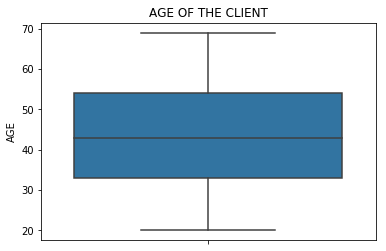

In [23]:
sns.boxplot(y=df_app_data['AGE'])
plt.title("AGE OF THE CLIENT")


There are no outliers present in the Age column. No need for further treatment

#### 6. YEARS_WRK_EXP

Text(0.5, 1.0, 'WORK EXPERIENCE OF THE CLIENT')

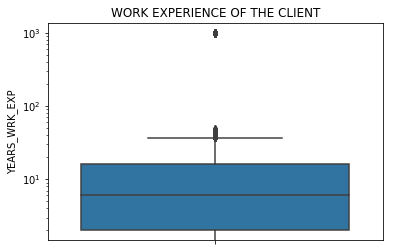

In [24]:
plt.yscale('log')
sns.boxplot(y=df_app_data['YEARS_WRK_EXP'])
plt.title("WORK EXPERIENCE OF THE CLIENT")

In [25]:
IQR5=(df_app_data.YEARS_WRK_EXP.quantile(0.75)-df_app_data.YEARS_WRK_EXP.quantile(0.25)) * 1.5
outlier5= IQR5 + df_app_data.YEARS_WRK_EXP.quantile(0.75)
outlier5

37.0

Text(0.5, 1.0, 'WORK EXPERIENCE OF THE CLIENT (Outliers Treated)')

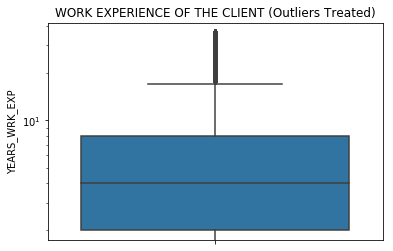

In [26]:
df_app_data=df_app_data[df_app_data.YEARS_WRK_EXP < outlier5]

plt.yscale('log')
sns.boxplot(y=df_app_data['YEARS_WRK_EXP'])
plt.title("WORK EXPERIENCE OF THE CLIENT (Outliers Treated)")

### Binning of Continous variable

##### Columns selected are as below :
1. AMT_CREDIT              
2. AGE

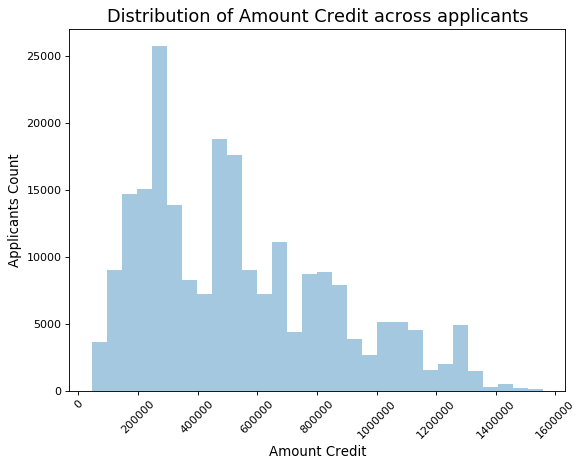

In [27]:
#### 1. AMT_CREDIT

plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
sns.distplot(df_app_data['AMT_CREDIT'],bins=30,kde=False)
#sns.distplot(df_app_data['AMT_CREDIT'],bins=25,kde=False)
plt.xticks(fontsize=10, rotation=45)
plt.title('Distribution of Amount Credit across applicants',fontsize=16)
plt.xlabel("Amount Credit",fontsize=12)
plt.ylabel("Applicants Count",fontsize=12)
plt.show()

Notes from graph "Distribution of Amount Credit across applicants" : 
1. Above graph shows range of Amount credit ,applicants applying for loan.
2. From the graph it can be seen that, maximum applicants are for amount credit less than Rs.500000

C:\Users\viraj\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


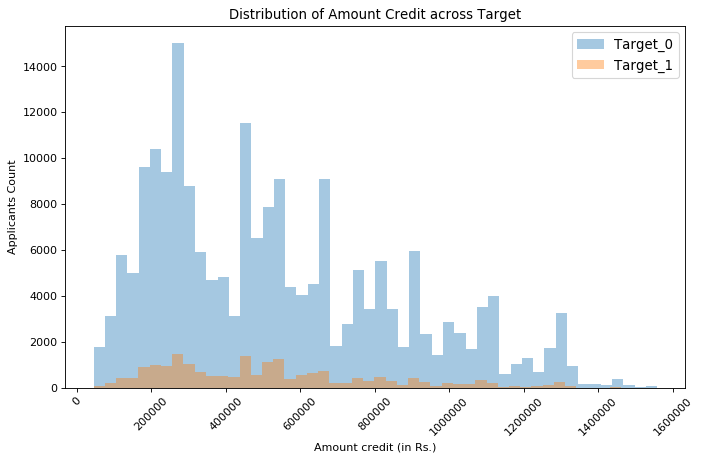

In [28]:
#'Lets see whats the distribution of amount credit among Target(Applicants having )'
plt.figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
df = df_app_data[df_app_data.TARGET == '0']
sns.distplot(df['AMT_CREDIT'],  kde=False, label='Target_0')

df = df_app_data[df_app_data.TARGET == '1']
sns.distplot(df['AMT_CREDIT'],  kde=False, label='Target_1')

plt.legend(prop={'size': 12})
plt.title('Distribution of Amount Credit across Target')
plt.xlabel('Amount credit (in Rs.)')
plt.ylabel('Applicants Count')
plt.xticks(rotation = 45)
plt.show()

Notes from the graph "Distribution of Amount credit across Target" : 
Amount credits are binned in groups of certain credit amount and categorised that data to see how many applicants with Target 0 and 1.
1. Most of applicants with Credit amount less than Rs. 500000 are with payment difficulties.
2. It can be clearly seen that number of applicants with Target 1 (client with payment difficulties) are much less than that of Target 0 (0 is for all other cases)for all the range of credit amount.

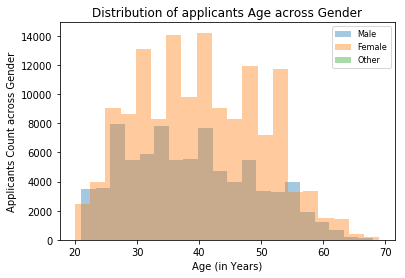

In [29]:
# 2. AGE
#Distribution of Applicant's Age in years across Gender
df = df_app_data[df_app_data.CODE_GENDER == "M"]
sns.distplot(df['AGE'],kde=False, label='Male',bins = 20)

df = df_app_data[df_app_data.CODE_GENDER == "F"]
sns.distplot(df['AGE'],kde=False, label='Female',bins = 20)

df = df_app_data[df_app_data.CODE_GENDER == "XNA"]
sns.distplot(df['AGE'],kde=False, label='Other',bins = 20)

plt.legend(prop={'size': 8})
plt.title('Distribution of applicants Age across Gender')
plt.xlabel('Age (in Years)')
plt.ylabel('Applicants Count across Gender')
plt.show()

Notes from graph "Distribution of applicants Age across Gender":<br>
Grouping the number of applicants in the Age group and checking its distribution to infer if at certain age, number of applicants are more or less.It is categorised across Gender to see its influence. <br>
1.Age is continous variable and above graph shows age of applicants across Gender.<br>
2.Maximum applicants are under age group late 20's to 40 years.<br>
3.In every age group, number of Females are high compared to Male.<br>
4.Number of female applicants are significantly higher in every age group whereas for Male, after age group 40, the number is decreasing.<br>

Taking **relevant columns** from application data for further analysis

In [30]:
#select only identified columns from dataset

df_app_data = df_app_data[['SK_ID_CURR','TARGET','NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','AGE',
'YEARS_WRK_EXP','OCCUPATION_TYPE','CNT_FAM_MEMBERS','ORGANIZATION_TYPE']]


In [31]:
df_app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,AGE,YEARS_WRK_EXP,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE
0,100002,1,Cash loans,M,N,Y,0,202500.000000,406597.500000,24700.500000,351000.000000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,25,1,Laborers,1,Business Entity Type 3
1,100003,0,Cash loans,F,N,N,0,270000.000000,1293502.500000,35698.500000,1129500.000000,Family,State servant,Higher education,Married,House / apartment,45,3,Core staff,2,School
2,100004,0,Revolving loans,M,Y,Y,0,67500.000000,135000.000000,6750.000000,135000.000000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,52,0,Laborers,1,Government
3,100006,0,Cash loans,F,N,Y,0,135000.000000,312682.500000,29686.500000,297000.000000,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,52,8,Laborers,2,Business Entity Type 3
4,100007,0,Cash loans,M,N,Y,0,121500.000000,513000.000000,21865.500000,513000.000000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,54,8,Core staff,1,Religion


In [32]:
df_app_data.describe()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,AGE,YEARS_WRK_EXP,CNT_FAM_MEMBERS
count,223818.000000,223818.000000,223818.000000,223818.000000,223818.000000,223818.000000,223818.000000,223818.000000
mean,0.500889,155167.816566,539393.008733,25110.736690,480355.346071,39.700234,5.860016,2.247786
std,0.764161,60566.199884,320411.141402,11254.019524,286311.839354,10.042251,6.181344,0.946646
min,0.000000,25650.000000,45000.000000,1980.000000,40500.000000,20.000000,0.000000,1.000000
25%,0.000000,112500.000000,270000.000000,16326.000000,234000.000000,31.000000,2.000000,2.000000
50%,0.000000,139500.000000,484789.500000,24318.000000,450000.000000,39.000000,4.000000,2.000000
75%,1.000000,198000.000000,755190.000000,32206.500000,675000.000000,47.000000,8.000000,3.000000
max,19.000000,337050.000000,1557544.500000,57366.000000,1345500.000000,69.000000,36.000000,20.000000


In [33]:
#Calculating the imbalance percentage of the TARGET column
round((df_app_data.TARGET[df_app_data['TARGET']=='1'].count()) / (df_app_data.TARGET[df_app_data['TARGET']=='0'].count()) * 100,2)

9.97

Imbalance percentage of the Target column = **9.97 %**

In [34]:
#Now let's divide the dataframe into two sets i.e. Target=1 and Target=0
df_target1=df_app_data[df_app_data['TARGET']=='1']

df_target0=df_app_data[df_app_data['TARGET']=='0']



## Univariate Analysis

#### Categorical Variables

Countplot will be used as visualizations to understand the distribution of each category.

#### Continuous Variables

Boxplot, Histogram/Distribution Plot, Violin Plot are drawn to understand the spread and central tendency of the variable.

### Categorical Variable

In [35]:
# Let's define a function which add's labels to the plot

def add_labels(ax):
    for p in ax.patches:        
        height = p.get_height()
        ax.text(p.get_x() + p.get_width()/2., height, height, fontsize=12, ha='center', va='bottom')   

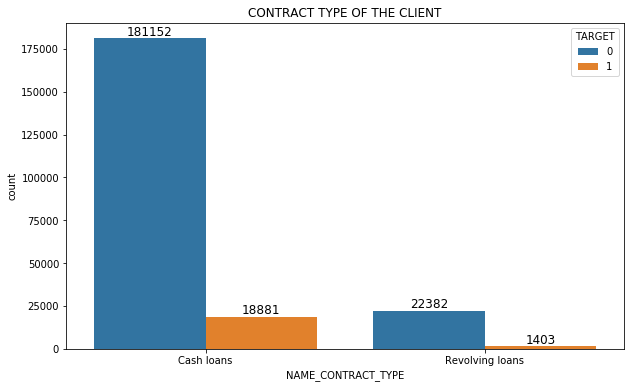

In [36]:
plt.figure(figsize=(10,6))
sns.countplot(data=df_app_data,x='NAME_CONTRACT_TYPE',hue='TARGET').set(title='CONTRACT TYPE OF THE CLIENT')
add_labels(plt.gca()) 

Clients with Cash loans are more likely to pay the loan without any difficulties

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


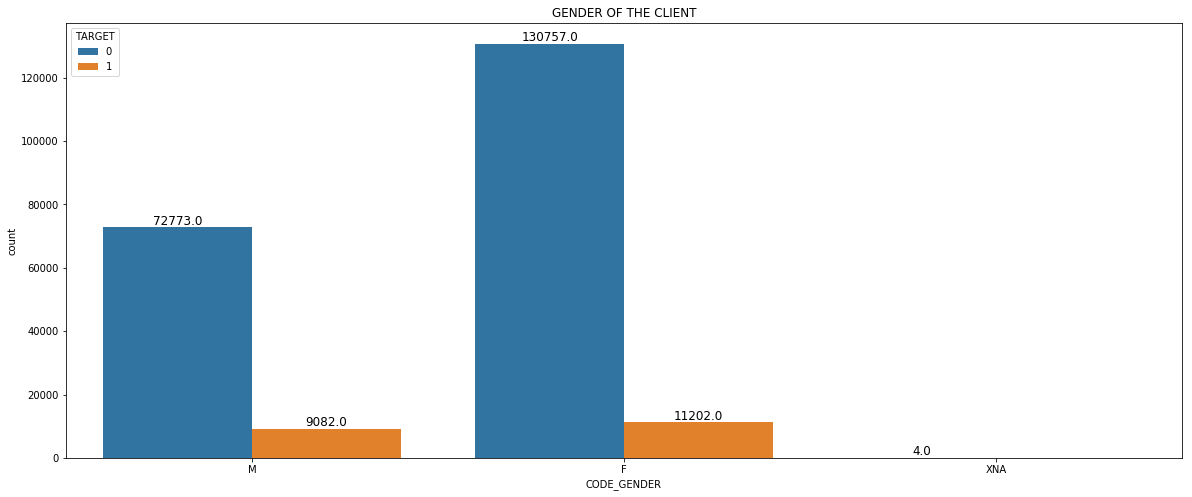

In [37]:
plt.figure(figsize=(20,8))
sns.countplot(data=df_app_data,x='CODE_GENDER',hue='TARGET').set(title='GENDER OF THE CLIENT')
add_labels(plt.gca()) 

Female application are more compared to Male because of low interest rates for females 

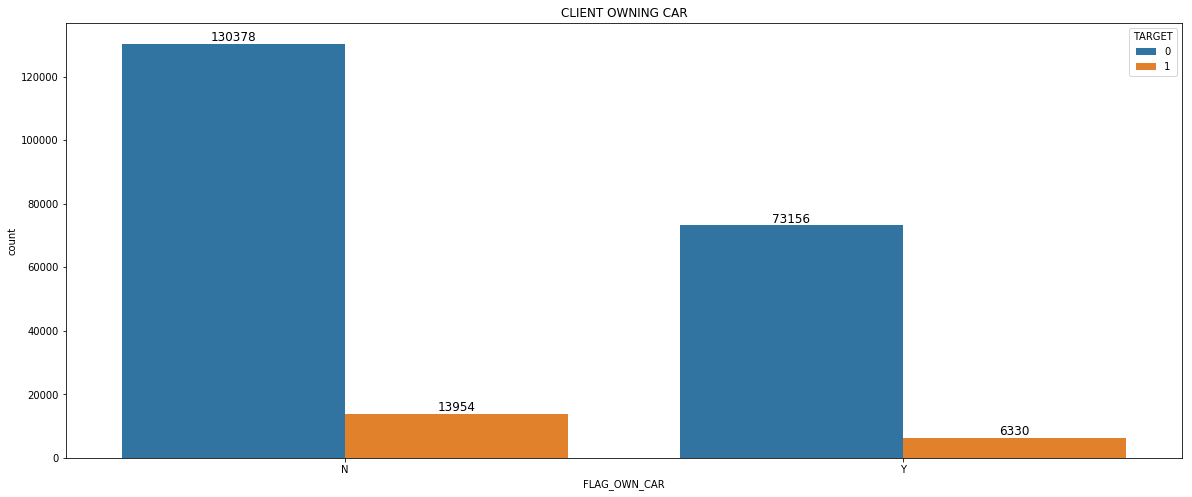

In [38]:
plt.figure(figsize=(20,8))
sns.countplot(data=df_app_data,x='FLAG_OWN_CAR',hue='TARGET').set(title='CLIENT OWNING CAR')
add_labels(plt.gca()) 

It's better to give loan for applicants without car ownership

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


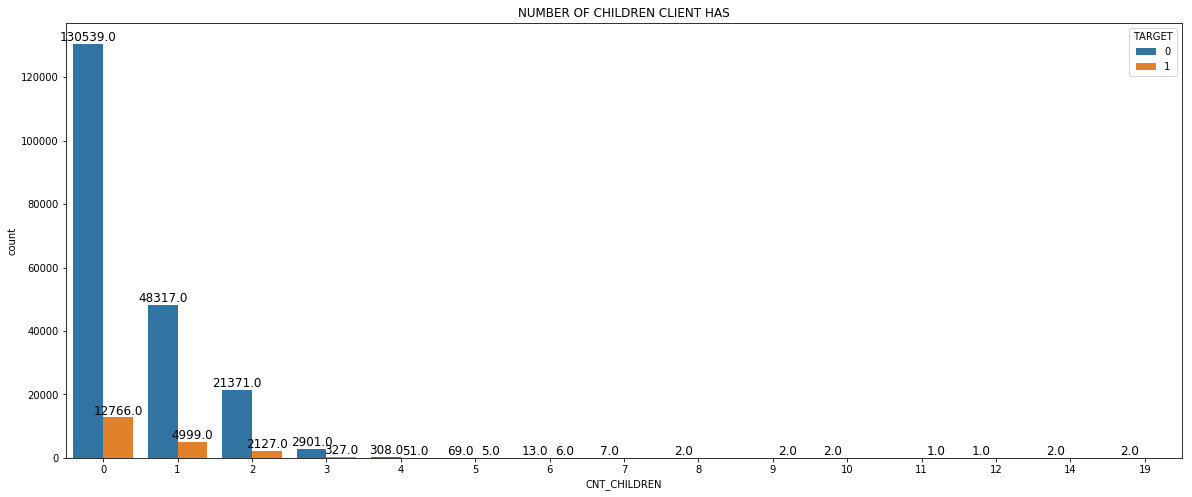

In [39]:
plt.figure(figsize=(20,8))
sns.countplot(data=df_app_data,x='CNT_CHILDREN',hue='TARGET').set(title='NUMBER OF CHILDREN CLIENT HAS')
add_labels(plt.gca()) 

Clients with no children will pay loan on time and follows a negative trend if number of children increases

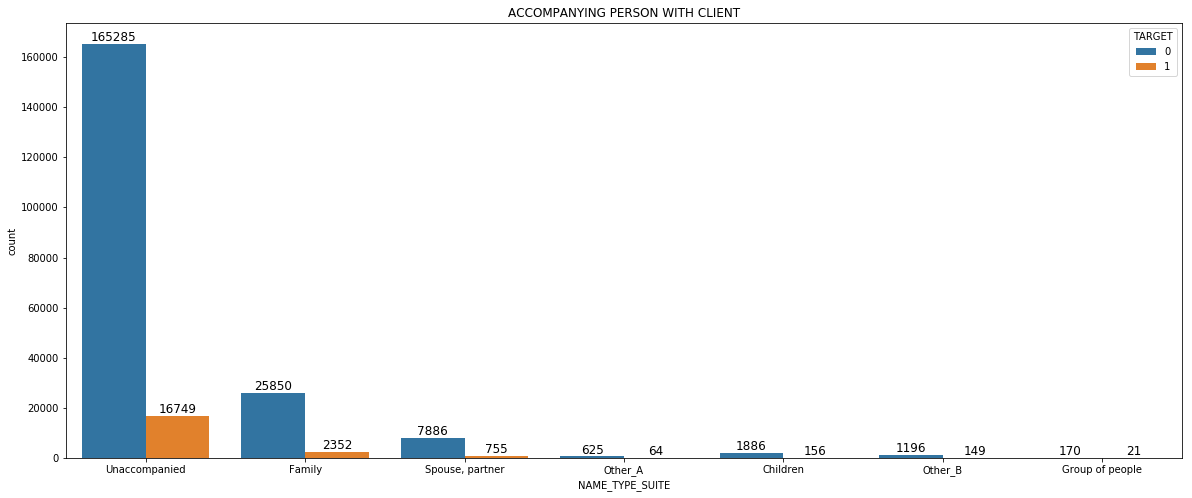

In [40]:
plt.figure(figsize=(20,8))
sns.countplot(data=df_app_data,x='NAME_TYPE_SUITE',hue='TARGET').set(title='ACCOMPANYING PERSON WITH CLIENT')
add_labels(plt.gca()) 

Clients come alone more often for loan application

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


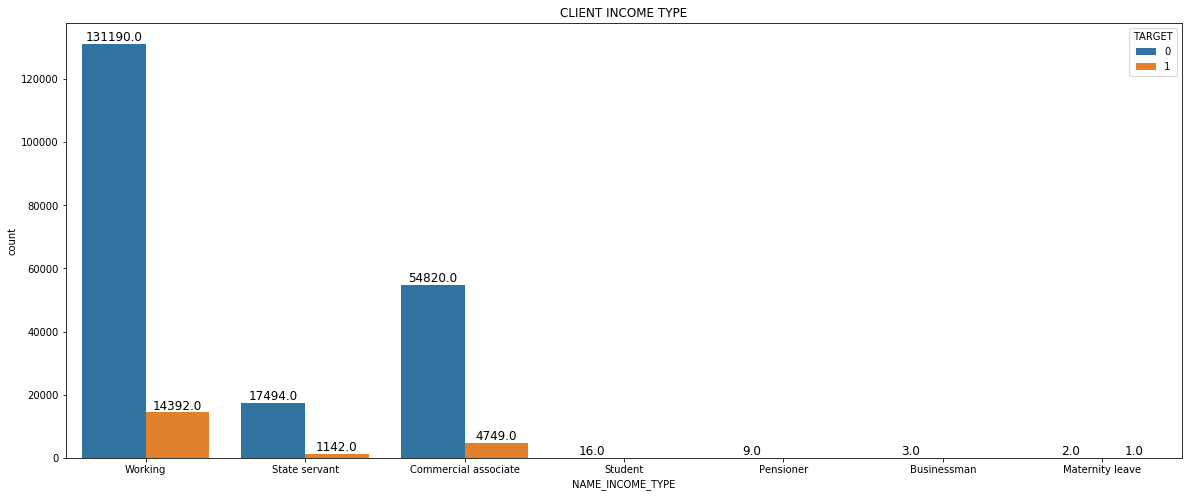

In [41]:
plt.figure(figsize=(20,8))
sns.countplot(data=df_app_data,x='NAME_INCOME_TYPE',hue='TARGET').set(title='CLIENT INCOME TYPE')
add_labels(plt.gca()) 


Most of the working people apply for the loan application

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


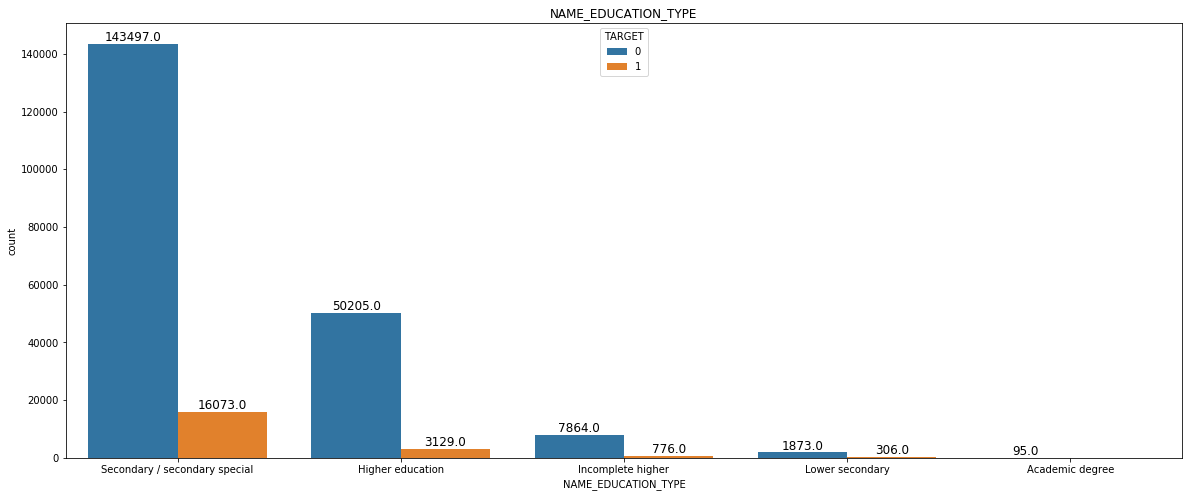

In [42]:
plt.figure(figsize=(20,8))
sns.countplot(data=df_app_data,x='NAME_EDUCATION_TYPE',hue='TARGET').set(title='NAME_EDUCATION_TYPE')
add_labels(plt.gca()) 

It is more favourable to give loan who had Secondary or Higher education than with lower education

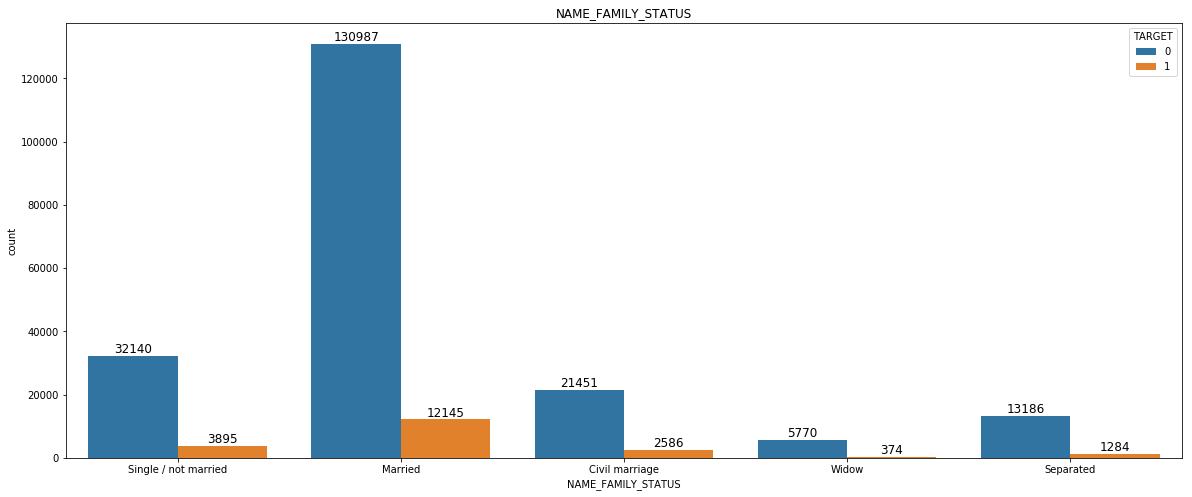

In [43]:
plt.figure(figsize=(20,8))
sns.countplot(data=df_app_data,x='NAME_FAMILY_STATUS',hue='TARGET').set(title='NAME_FAMILY_STATUS')
add_labels(plt.gca()) 


Married clients tend to have less chance of becoming defaulters

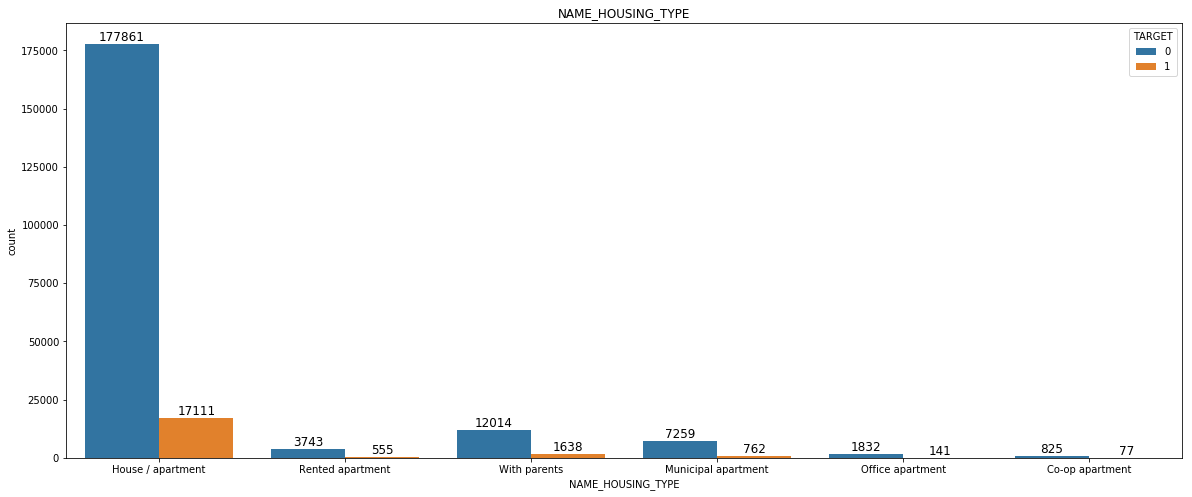

In [44]:
plt.figure(figsize=(20,8))
sns.countplot(data=df_app_data,x='NAME_HOUSING_TYPE',hue='TARGET').set(title='NAME_HOUSING_TYPE')
add_labels(plt.gca()) 

Clients living in House/Apartment are more likely to pay the loan on time

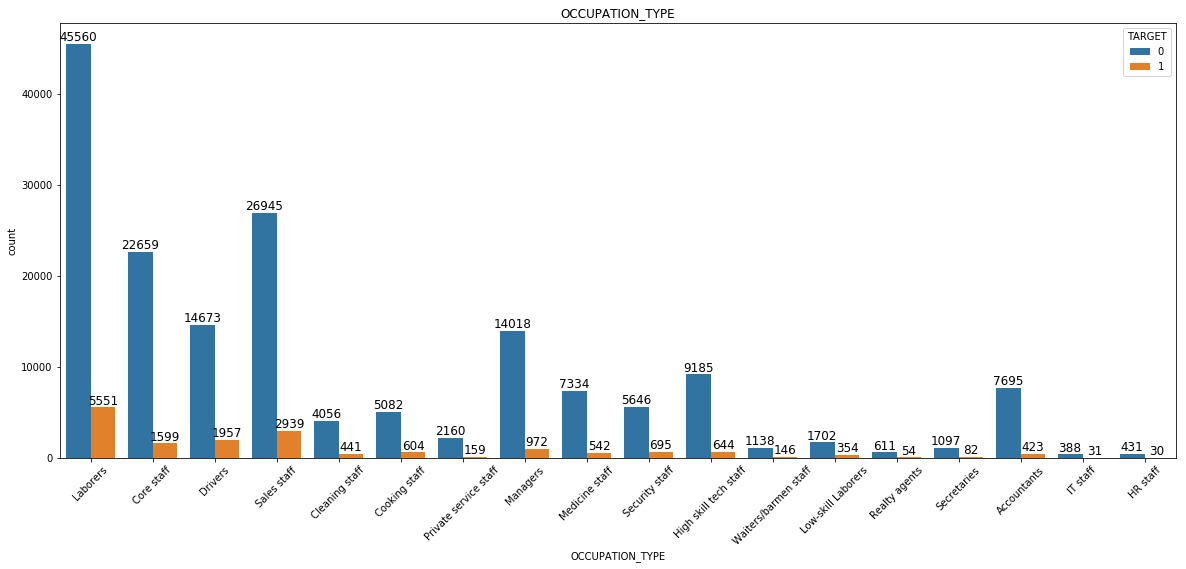

In [45]:
plt.figure(figsize=(20,8))
ax=sns.countplot(data=df_app_data,x='OCCUPATION_TYPE',hue='TARGET').set(title='OCCUPATION_TYPE')
x=plt.xticks(rotation=45)
add_labels(plt.gca()) 

Laborers, core staff, drivers and sales staff require loan mostly and these occupation people have less chance of becoming defaulters

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


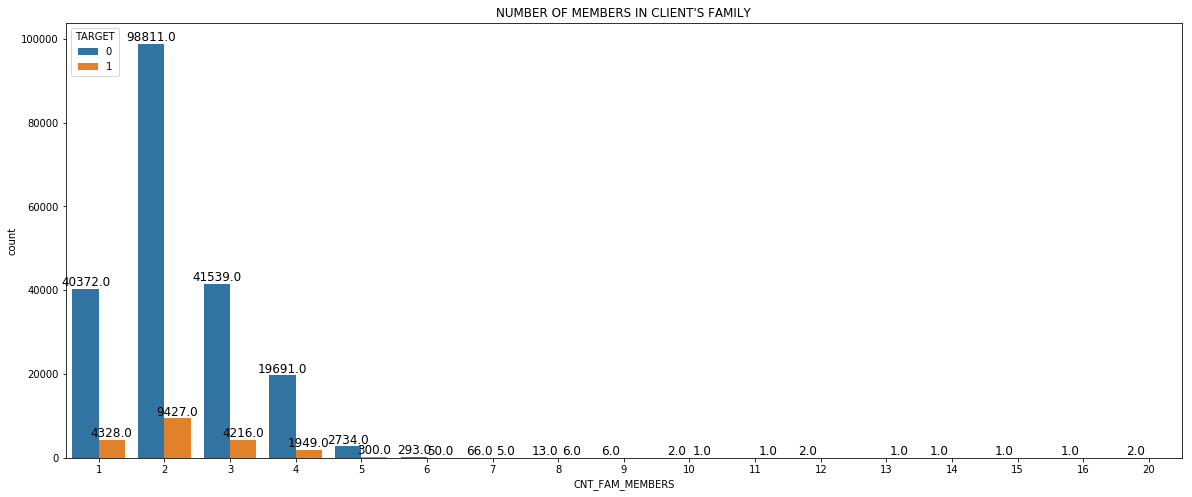

In [46]:
plt.figure(figsize=(20,8))
sns.countplot(data=df_app_data,x='CNT_FAM_MEMBERS',hue='TARGET').set(title="NUMBER OF MEMBERS IN CLIENT'S FAMILY")
add_labels(plt.gca()) 

Clients living with two persons most likely require loan and has more than 90% probability of paying loan without any difficulties

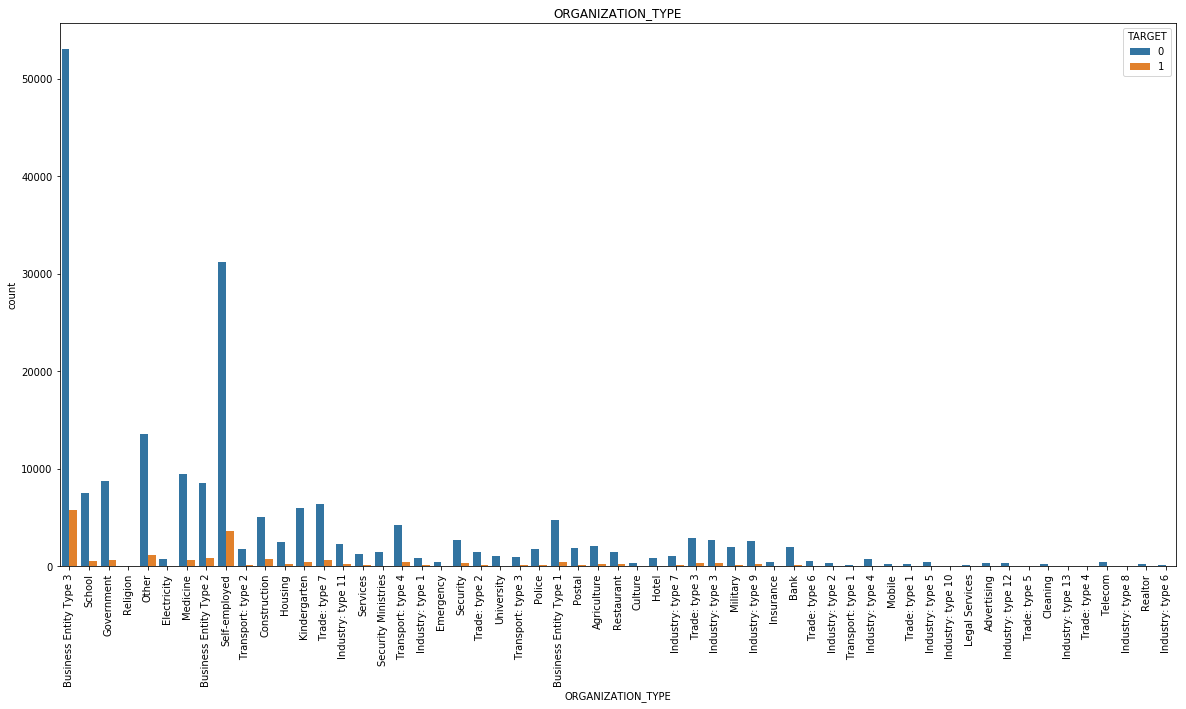

In [47]:
plt.figure(figsize=(20,10))
sns.countplot(data=df_app_data,x='ORGANIZATION_TYPE',hue='TARGET').set(title='ORGANIZATION_TYPE')
x=plt.xticks(rotation=90)


Most of the business people and self-employed are more likely to pay every installment in scheduled period

### CORRELATION MATRIX

In [48]:
c=df_target1.corr()
s = c.unstack()
so = s.sort_values(kind="quicksort",ascending=False).drop_duplicates()
corr_target1=pd.DataFrame(so)
corr_target1

0
CNT_FAM_MEMBERS  CNT_FAM_MEMBERS   1.000000
AMT_GOODS_PRICE  AMT_CREDIT        0.977884
CNT_FAM_MEMBERS  CNT_CHILDREN      0.893460
AMT_CREDIT       AMT_ANNUITY       0.740558
AMT_ANNUITY      AMT_GOODS_PRICE   0.738456
                 AMT_INCOME_TOTAL  0.374433
AMT_INCOME_TOTAL AMT_GOODS_PRICE   0.305387
AGE              YEARS_WRK_EXP     0.305153
AMT_CREDIT       AMT_INCOME_TOTAL  0.303204
AGE              AMT_CREDIT        0.188637
                 AMT_GOODS_PRICE   0.184819
AMT_GOODS_PRICE  YEARS_WRK_EXP     0.120078
AMT_CREDIT       YEARS_WRK_EXP     0.113132
AGE              AMT_INCOME_TOTAL  0.087834
                 AMT_ANNUITY       0.081628
CNT_FAM_MEMBERS  AMT_ANNUITY       0.060927
AMT_CREDIT       CNT_FAM_MEMBERS   0.056359
AMT_GOODS_PRICE  CNT_FAM_MEMBERS   0.053328
AMT_ANNUITY      YEARS_WRK_EXP     0.049832
YEARS_WRK_EXP    AMT_INCOME_TOTAL  0.030258
AMT_ANNUITY      CNT_CHILDREN      0.021207
CNT_CHILDREN     AMT_CREDIT        0.006071
YEARS_WRK_EXP    CNT_FAM_MEMBERS   0.002823
CNT_CHILDREN     AMT_GOODS_PRICE  -0.000113
CNT_FAM_MEMBERS  AMT_INCOME_TOTAL -0.029531
YEARS_WRK_EXP    CNT_CHILDREN     -0.029827
AMT_INCOME_TOTAL CNT_CHILDREN     -0.034594
CNT_FAM_MEMBERS  AGE              -0.108569
AGE              CNT_CHILDREN     -0.173281

In [49]:
c=df_target0.corr()
s = c.unstack()
so = s.sort_values(kind="quicksort",ascending=False).drop_duplicates()
corr_target0=pd.DataFrame(so)
corr_target0

0
CNT_FAM_MEMBERS  CNT_FAM_MEMBERS   1.000000
AMT_GOODS_PRICE  AMT_CREDIT        0.981310
CNT_FAM_MEMBERS  CNT_CHILDREN      0.892272
AMT_ANNUITY      AMT_CREDIT        0.753513
AMT_GOODS_PRICE  AMT_ANNUITY       0.751926
AMT_ANNUITY      AMT_INCOME_TOTAL  0.387304
AGE              YEARS_WRK_EXP     0.340199
AMT_INCOME_TOTAL AMT_GOODS_PRICE   0.314019
AMT_CREDIT       AMT_INCOME_TOTAL  0.310507
                 AGE               0.154266
AGE              AMT_GOODS_PRICE   0.149651
AMT_GOODS_PRICE  YEARS_WRK_EXP     0.085037
YEARS_WRK_EXP    AMT_CREDIT        0.083187
AMT_ANNUITY      AGE               0.081655
CNT_FAM_MEMBERS  AMT_ANNUITY       0.043024
AMT_ANNUITY      YEARS_WRK_EXP     0.040086
AGE              AMT_INCOME_TOTAL  0.038565
AMT_CREDIT       CNT_FAM_MEMBERS   0.036700
AMT_GOODS_PRICE  CNT_FAM_MEMBERS   0.034874
AMT_INCOME_TOTAL YEARS_WRK_EXP     0.025853
AMT_ANNUITY      CNT_CHILDREN     -0.005063
CNT_CHILDREN     AMT_CREDIT       -0.016013
AMT_GOODS_PRICE  CNT_CHILDREN     -0.020586
CNT_FAM_MEMBERS  AMT_INCOME_TOTAL -0.022423
YEARS_WRK_EXP    CNT_FAM_MEMBERS  -0.023958
AMT_INCOME_TOTAL CNT_CHILDREN     -0.025170
CNT_CHILDREN     YEARS_WRK_EXP    -0.056096
CNT_FAM_MEMBERS  AGE              -0.174539
CNT_CHILDREN     AGE              -0.238530

From the above two tables, we can infer that:

- For both the targets 0 and 1, the top five correlation pairs follow the same rank in both the cases
- All the amounts are highly correlated to each other.
- Goods price and Credit Amount is very highly correlated with 0.98, most applicants are getting the loan approved with the same amount as required for applicant and there is very less chances of reduction in the amount approved
- It's highly obvious about the family members and number of children with 0.89 correlation
- Also Annuity amount has same correlation with Credit Amount and Goods price amount

### Continuous Variables

In [50]:
from pylab import *
def univariate_analysis(df, col,title):
       
    sns.set(style='darkgrid')
    plt.figure(figsize=(20, 8))
    
    plt.subplot(1, 3, 1)
    sns.boxplot(data=df, x=col, orient='v').set(title='Box Plot')
    
    plt.subplot(1, 3, 2)
    sns.distplot(df[col]).set(title='Dist Plot')
    
    plt.subplot(1, 3, 3)
    sns.violinplot(data =df, x=col, inner='quartile').set(title='Violin Plot')    
    
    fig=gcf()
    fig.suptitle(title)


#### INCOME AMOUNT OF THE CLIENT

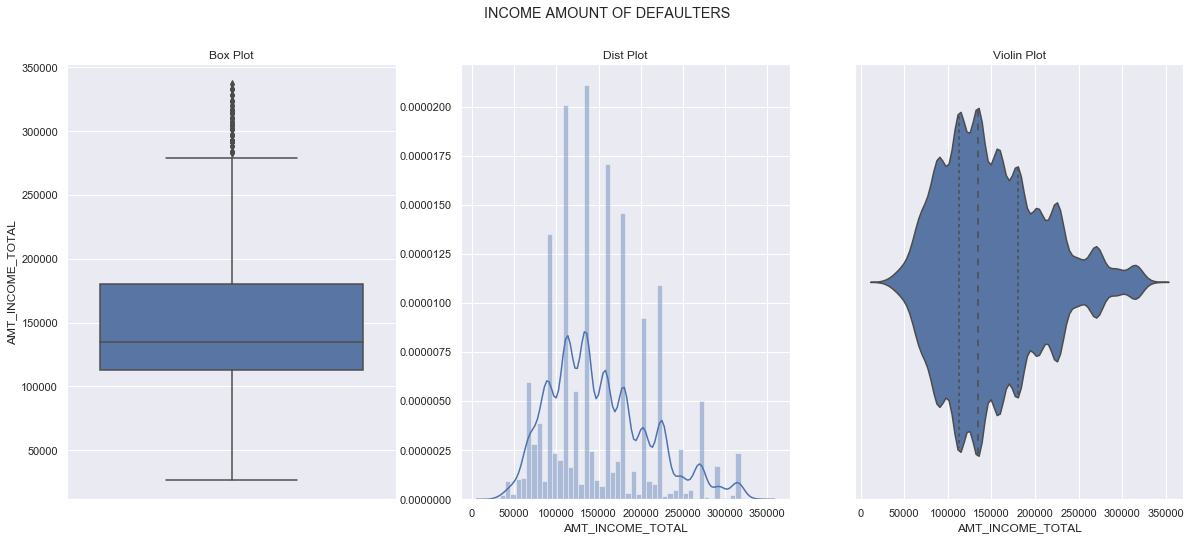

In [51]:
#Plotting for clients with defaults
univariate_analysis(df=df_target1,col='AMT_INCOME_TOTAL',title="INCOME AMOUNT OF DEFAULTERS")

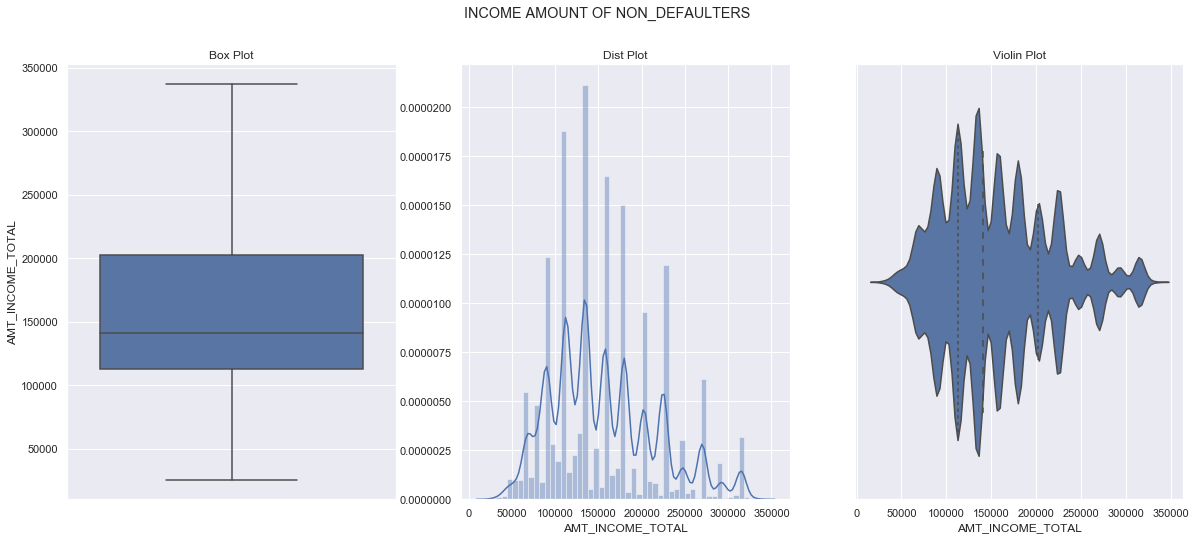

In [52]:
#Plotting for non-defaulter clients
univariate_analysis(df=df_target0,col='AMT_INCOME_TOTAL',title="INCOME AMOUNT OF NON_DEFAULTERS")

- Clients income is spread equally in both the target cases but from the box plots, one difference is that most of the non-defaulters clients have income more than the median income.
- This tells us that clients with income between 150000-200000 may be beneficial for getting non-defaulters clients
- Clients with income between 100000-150000 are most likely to become defaulters

#### CREDIT AMOUNT OF THE LOAN

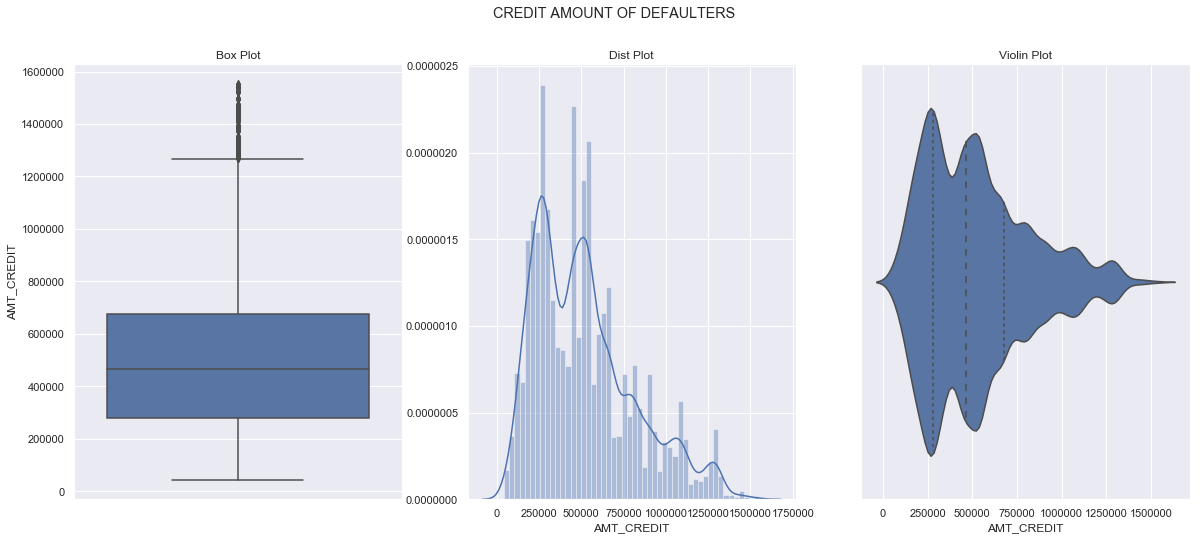

In [53]:
univariate_analysis(df=df_target1,col='AMT_CREDIT',title="CREDIT AMOUNT OF DEFAULTERS")

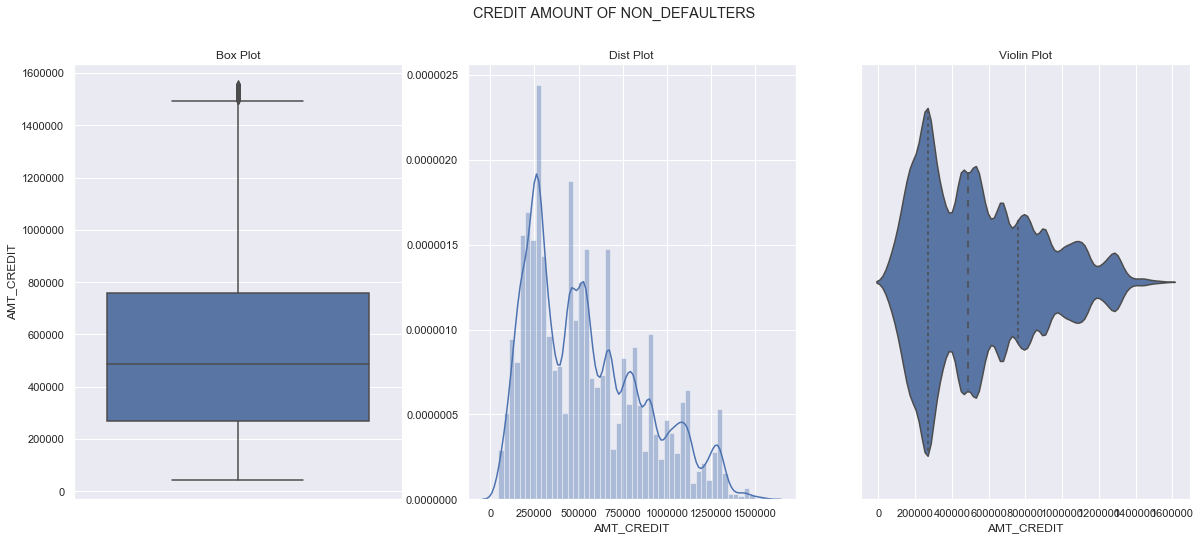

In [54]:
univariate_analysis(df=df_target0,col='AMT_CREDIT',title="CREDIT AMOUNT OF NON_DEFAULTERS")

- Most clients gets 250000 loan amount approved in both the cases
- Clients with loan credit between 250000-500000 have more chances to become defaulters

#### ANNUITY AMOUNT FOR THE CLIENT

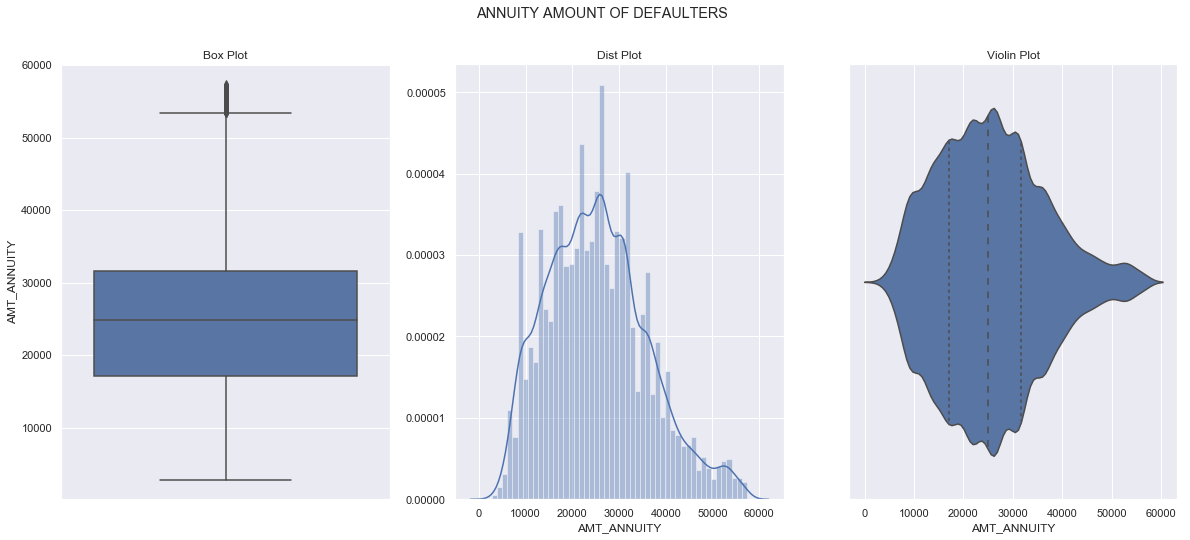

In [55]:
univariate_analysis(df=df_target1,col='AMT_ANNUITY',title="ANNUITY AMOUNT OF DEFAULTERS")

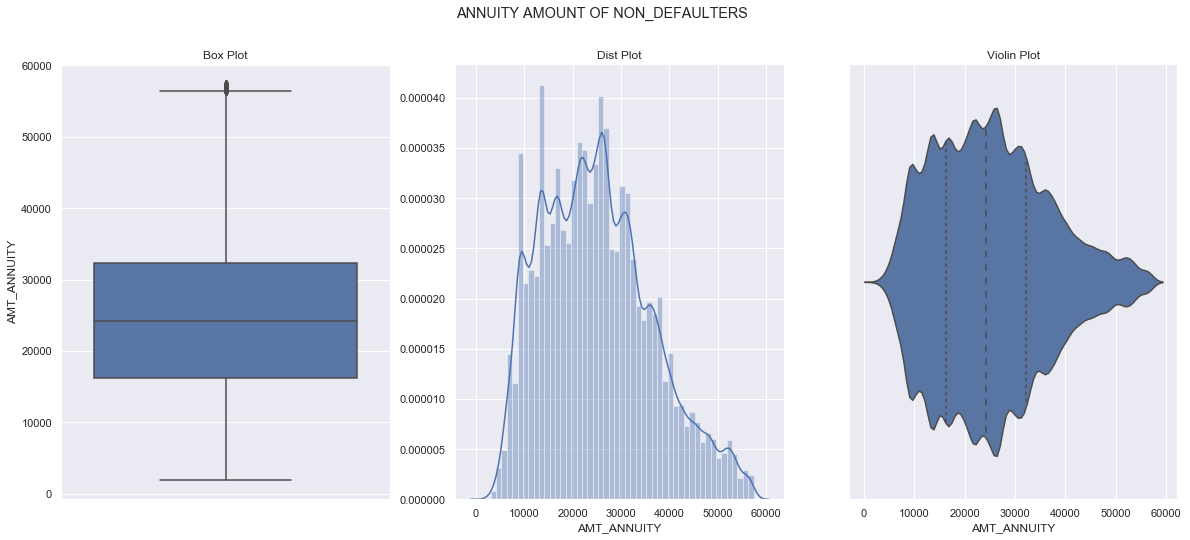

In [56]:
univariate_analysis(df=df_target0,col='AMT_ANNUITY',title="ANNUITY AMOUNT OF NON_DEFAULTERS")

- Annuity amount shows normally distributed pattern in both the cases
- Mostly client gets 15000-30000 as annuity amount for the loan

#### GOODS PRICE FOR THE LOAN

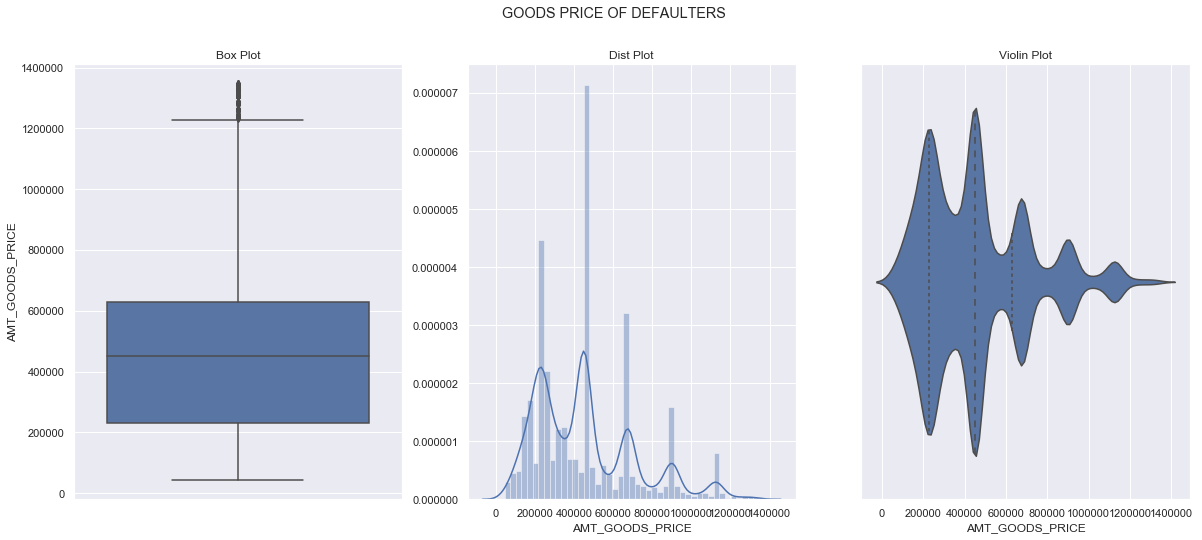

In [57]:
univariate_analysis(df=df_target1,col='AMT_GOODS_PRICE',title="GOODS PRICE OF DEFAULTERS")

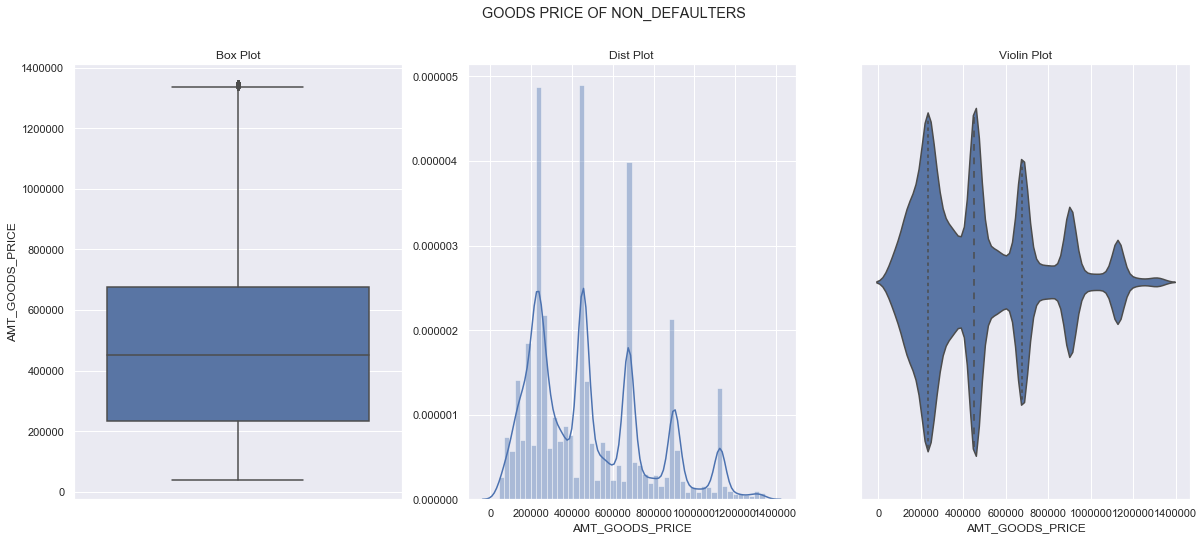

In [58]:
univariate_analysis(df=df_target0,col='AMT_GOODS_PRICE',title="GOODS PRICE OF NON_DEFAULTERS")

- Maximum defaulters lie betweeen goods price amount of 225000-425000
- There are specific amounts where clients have proven to be non-defaulters such as 200000,425000 and 650000. Clients with these goods price may belong to the same category and are non-defaulters

#### CLIENT'S AGE

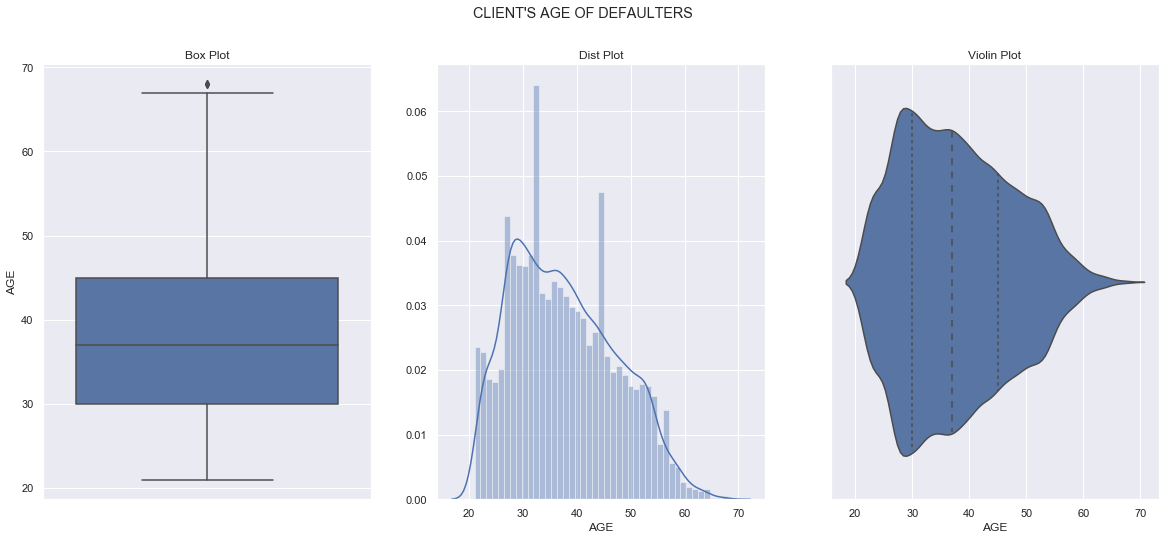

In [59]:
univariate_analysis(df=df_target1,col='AGE',title="CLIENT'S AGE OF DEFAULTERS")

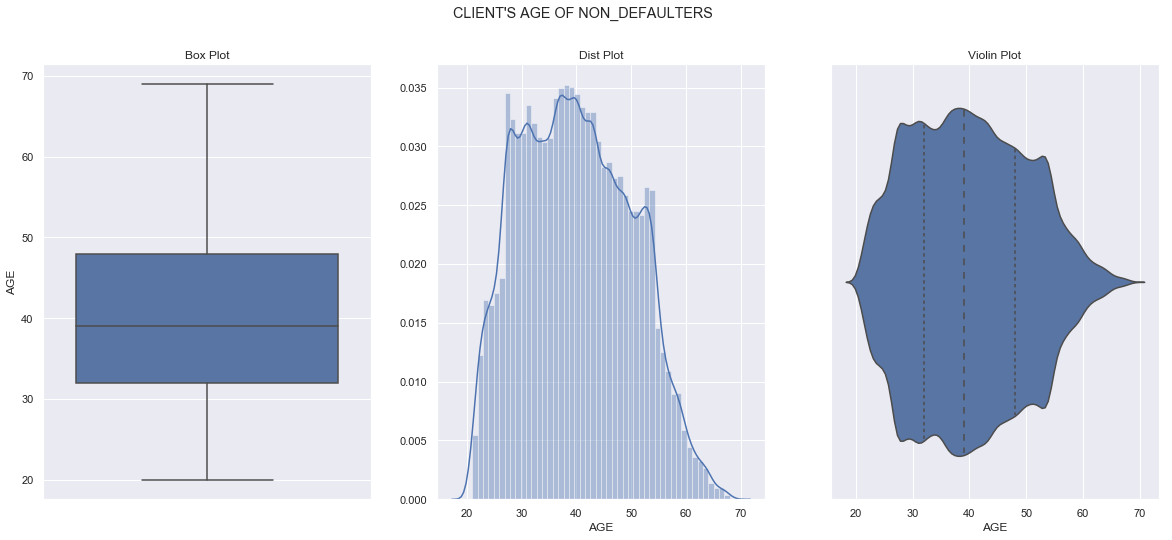

In [60]:
univariate_analysis(df=df_target0,col='AGE',title="CLIENT'S AGE OF NON_DEFAULTERS")

- Many clients with age 32 and 45 years are defaulters.
- Client's age show a normal trend such that clients with every age category requires loan.
- But clients with age between 30-40 can pay the loan without any difficulties.

#### CLIENT'S WORK EXPERIENCE

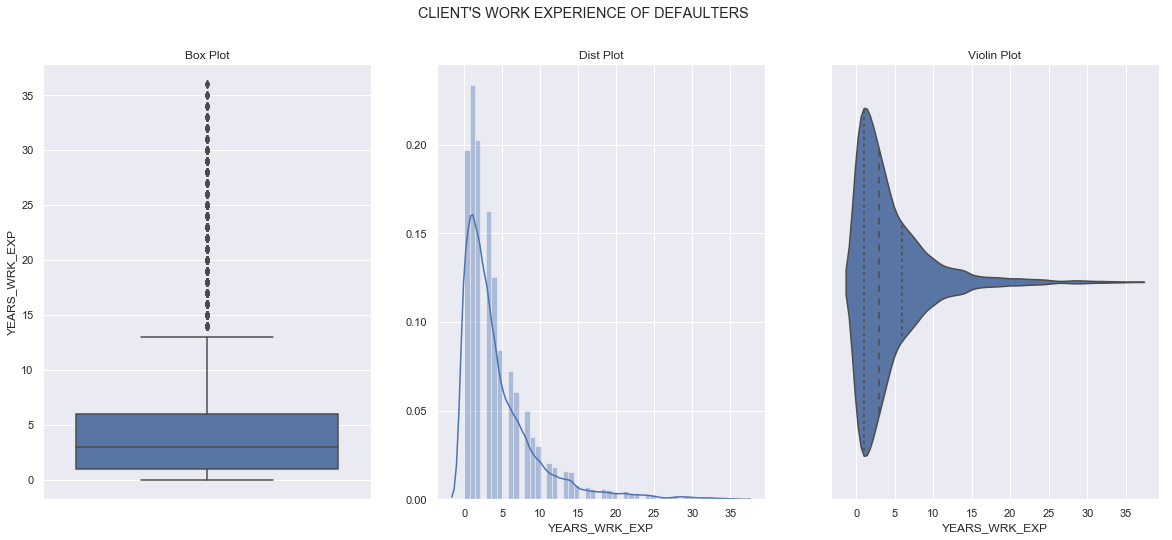

In [61]:
univariate_analysis(df=df_target1,col='YEARS_WRK_EXP',title="CLIENT'S WORK EXPERIENCE OF DEFAULTERS")

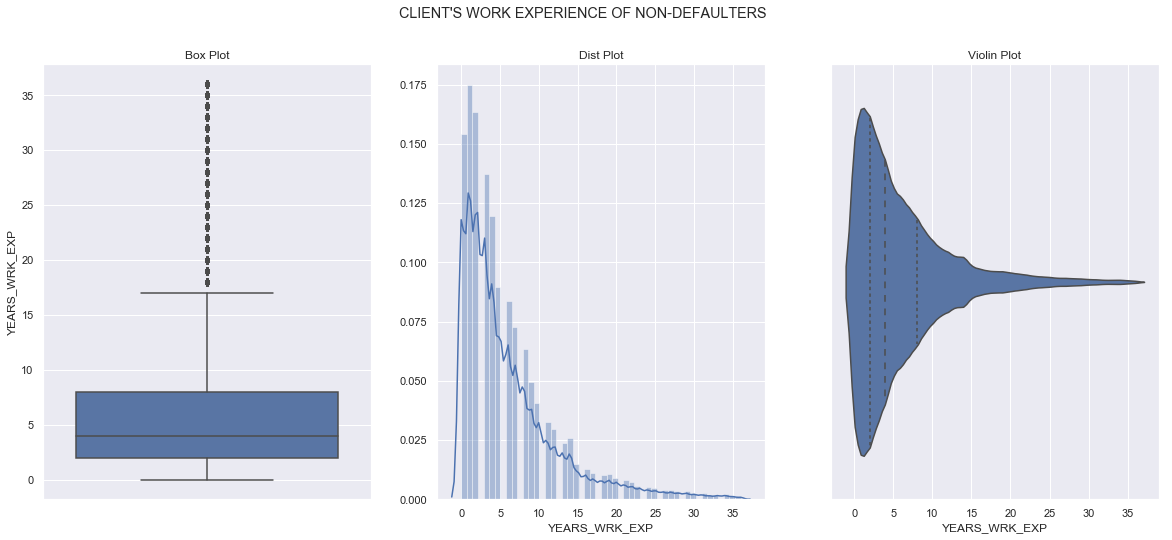

In [62]:
univariate_analysis(df=df_target0,col='YEARS_WRK_EXP',title="CLIENT'S WORK EXPERIENCE OF NON-DEFAULTERS")

- Most applications are from clients with 2 years of experience in both the cases
- Work experience has negative trend with the increase years of experience.
- Bank should focus more on clients with 2 years of experience to increase their business.

## Bivariate Analysis 

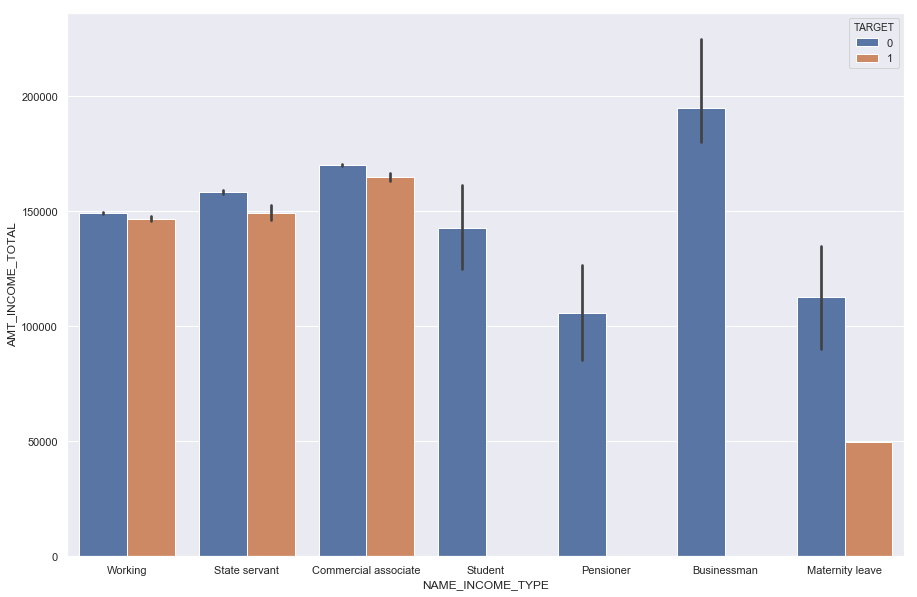

In [63]:
plt.figure(figsize=(15,10))
sns.barplot(data=df_app_data,x='NAME_INCOME_TYPE',y='AMT_INCOME_TOTAL',hue='TARGET')